In [2]:
import matplotlib.pyplot as plt
import pandas as pd

### With 100 points, three cases:

1. Ideal
2. Gaussian noise
3. Uniform noise

we have created a dataset with 100 points. The relation we want to investigate is

$$
2.5382 cos(x)+x^2-0.5
$$

In [3]:
import numpy as np

X = 5 * np.random.randn(100,1)
a = 2 #weight for noise
y = 2.5382 * np.cos(X) + X ** 2 - 0.5 
n = y + a*np.random.randn(100,1)
u = y + a*np.random.rand(100,1)

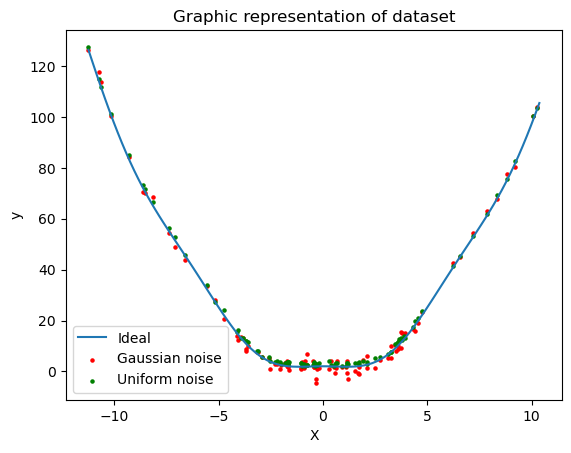

In [4]:
x = np.arange(np.min(X),np.max(X)+0.2, 0.2)
g = 2.5382 * np.cos(x) + x ** 2 - 0.5 
plt.plot(x,g, label='Ideal')
plt.scatter(X,n, label='Gaussian noise', s=5, color='r')
plt.scatter(X,u, label='Uniform noise', s=5, color='green')
plt.title('Graphic representation of dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

from pysr import PySRRegressor

model = PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)    
    procs=8,
)

In [5]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "sin",
        "exp",
        "log",
    ],
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)    
    warm_start=True,
    turbo=True,
    #batching=True, not so useful for this example
)

## 1. Ideal


In [6]:
model.fit(X, y)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/julia_helpers.py:208: UserWarning: Your system's Python library is static (e.g., conda), so precompilation will be turned off. For a dynamic library, try using `pyenv` and installing with `--enable-shared`: https://github.com/pyenv/pyenv/blob/master/plugins/python-build/README.md#building-with---enable-shared.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          20.290546   
	1        2.771987                                          (x0 * x0)   
	2        0.087151                           ((x0 * x0) + -0.7654157)   
	3        0.674903                              ((x0 * x0) + cos(x0))   
	4        0.928895                ((x0 * x0) + (cos(x0) * 2.6452265))   
	5        0.822889  (((x0 * x0) + (cos(x0) * 2.224396)) + -0.5434598)   
	6        2.267791  (((x0 * x0) + (cos(x0) * exp(0.95847315))) + -...   
	7        0.520171  (((x0 * x0) + (cos(x0) * exp(0.95847315))) + s...   
	8        0.227841  (((x0 * x0) + (cos(x0) * exp(0.95847315))) + s...   
	9  >>>>  2.068316  ((((((log(0.3678835) + x0) * x0) + exp(exp(-3....   
	
	           loss  complexity  
	0  9.363985e+02           1  
	1  3.662212e+00           3  
	2  3.076416e+00           5  
	3  1.566529e+00           6  
	4  2.444051e-01           8  
	5  4.713656e-02          10  
	6  4.880550e-03          11  
	7  2.901091e-03          12  
	8  2.309997e-03          13  
	9  9.420241e-09          19  
]

In [7]:
p_1 = model.predict(X)
l_1 = model.latex()
p=[]
l=[]
p.append(p_1), l.append(l_1)

(None, None)

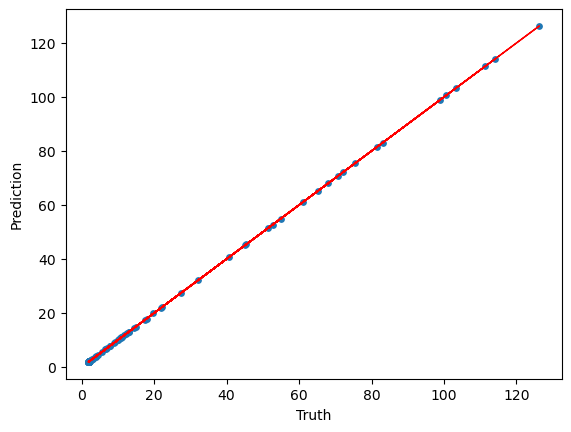

In [8]:
plt.scatter(y, p_1,s=15)
plt.plot(y,y, color='r', lw=1)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()

In [9]:
from IPython.display import Markdown as md
md(f"The model has this equation as output: ${l[0]}$")

The model has this equation as output: $x_{0} \left(x_{0} - 1.00\right) + x_{0} + 2.54 \cos{\left(x_{0} \right)} - 0.500$

## 2. Gaussian noise


In [10]:
model.fit(X,n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          20.282051   
	1        2.472459                                          (x0 * x0)   
	2        0.045750                           ((x0 * x0) + -0.7741371)   
	3  >>>>  0.229024                              ((x0 * x0) + cos(x0))   
	4        0.110985                ((x0 * x0) + (cos(x0) * 2.4236968))   
	5        0.035610  (((x0 * x0) + (cos(x0) * 2.224396)) + -0.5434598)   
	6        0.000441  (((x0 * x0) + (cos(x0) * (2.224396 + 0.0694052...   
	7        0.009843  ((((x0 * (x0 * 1.0098835)) + cos(x0)) + cos(x0...   
	8        0.001481  ((((x0 * (x0 * 1.0098835)) + cos(x0)) + sin((x...   
	9        0.001076  ((((x0 * (x0 * 1.0098835)) + cos(x0)) + sin((x...   
	
	         loss  complexity  
	0  962.549740           1  
	1    6.852869           3  
	2    6.253664           5  
	3    4.973597           6  
	4    3.983546           8  
	5    3.709708          10  
	6    3.706435          12  
	7    3.670130          13  
	8    3.648455          17  
	9    3.640614          19  
]

In [11]:
p_2 = model.predict(X)
l_2 = model.latex()
p.append(p_2), l.append(l_2)

(None, None)

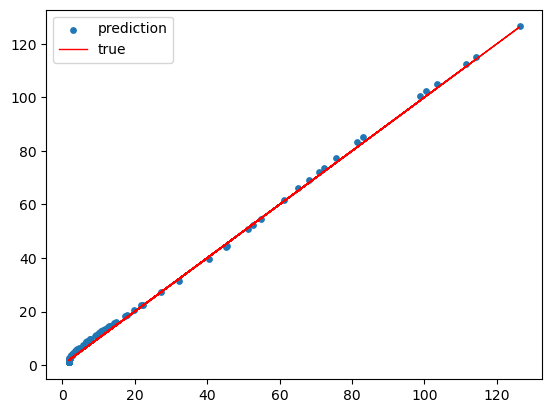

In [12]:
plt.scatter(y, p_2,s=15, label='prediction')
plt.plot(y,y, color='r', lw=1, label='true')
plt.legend()
plt.show()

In [13]:
md(f"The model has this equation as output: ${l[1]}$")

The model has this equation as output: $x_{0}^{2} + \cos{\left(x_{0} \right)}$

## 3. Uniform noise

In [14]:
model.fit(X,u)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick         score                                           equation  \
	0        0.000000e+00                                          21.298847   
	1        2.820906e+00                                          (x0 * x0)   
	2        8.995581e-03                           ((x0 * x0) + 0.24280158)   
	3        7.820579e-01                              ((x0 * x0) + cos(x0))   
	4        4.740329e-01                ((x0 * x0) + (cos(x0) * 2.3654683))   
	5  >>>>  2.781328e-01  ((x0 * x0) + ((cos(x0) * 2.4728081) + 0.501440...   
	6        3.027247e-08  ((((x0 * x0) + (cos(x0) * 2.4728065)) + sin(ex...   
	7        9.700687e-04  (((x0 * x0) + cos(x0)) + ((sin(cos(cos(x0) + 0...   
	8        1.683002e-02  (((x0 * x0) + sin(cos(x0))) + ((sin(cos(cos(x0...   
	
	         loss  complexity  
	0  933.125500           1  
	1    3.309268           3  
	2    3.250263           5  
	3    1.486877           6  
	4    0.576150           8  
	5    0.330333          10  
	6    0.330333          16  
	7    0.329373          19  
	8    0.323876          20  
]

In [15]:
p_3 = model.predict(X)
l_3 = model.latex()
p.append(p_3), l.append(l_3)

(None, None)

In [ ]:
plt.scatter(y, p_3,s=15, label='prediction')
plt.plot(y,y, color='r', lw=1, label='true')
plt.legend()
plt.show()

In [16]:
md(f"The model has this equation as output: ${l[2]}$")

The model has this equation as output: $x_{0}^{2} + 2.47 \cos{\left(x_{0} \right)} + 0.501$

## Comparison beetween ideal and noised

Gaussian

I compute the diferences between ideal and noised data, and later I used the discovered formulas to do the same:

In [17]:
d_1 = y-n 
d_2 = p_1-p_2

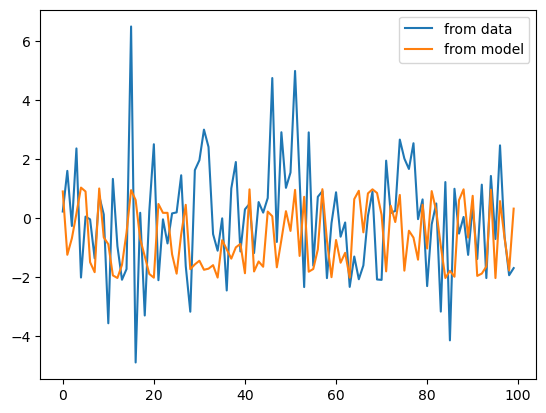

In [18]:
plt.plot(d_1, label='from data')
plt.plot(d_2, label='from model')
plt.legend()

seems that the model reduces the discrepances between ideal data and gaussian-noised data: I think that's fine because we find in both cases two formulas very similar. ($ x^2+a\cdot cos(x)+ b$, where  $a, b \in \mathbb{R}$)


Uniform

In [19]:
r_1 = y-u
r_2 = p_1-p_3

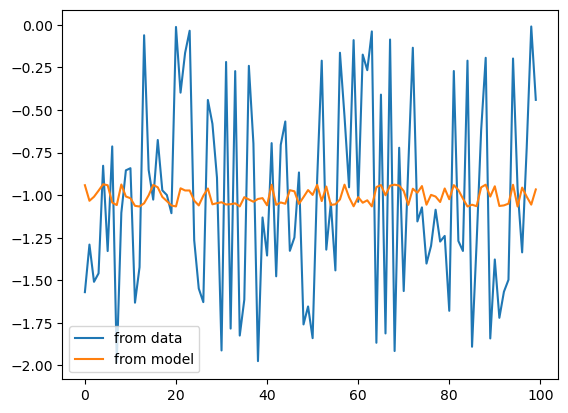

In [20]:
plt.plot(r_1, label='from data')
plt.plot(r_2, label='from model')
plt.legend()

## Tryhard #1: using only 50 points

In [56]:
X = 5 * np.random.randn(50,1)
y = 2.5382 * np.cos(X) + X ** 2 - 0.5 
n = y + a*np.random.randn(50,1)
u = y + a*np.random.rand(50,1)

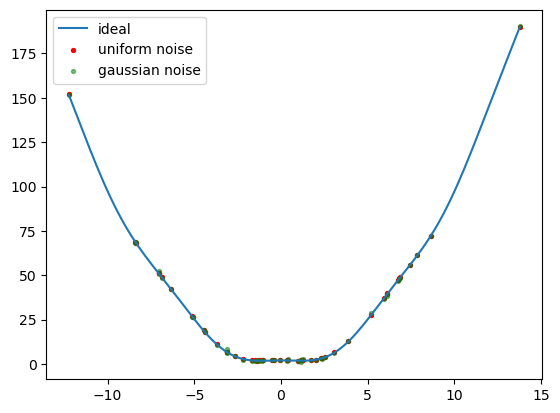

In [62]:
x = np.arange(np.min(X),np.max(X)+0.2, 0.2)
g = 2.5382 * np.cos(x) + x ** 2 - 0.5 
plt.plot(x,g, label='ideal')
plt.scatter(X,u, label='uniform noise', color='r', s=8)
plt.scatter(X,n, label='gaussian noise', color='green', s=8, alpha=0.5)
plt.legend()

Ideal

In [23]:
model.fit(X, y)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          30.560436   
	1        3.067056                                          (x0 * x0)   
	2        0.081168                           ((x0 * x0) + -0.7607324)   
	3        0.694892                              ((x0 * x0) + cos(x0))   
	4        0.947907                ((x0 * x0) + (cos(x0) * 2.6854653))   
	5        1.372863  ((x0 * x0) + ((cos(x0) + -0.20621957) * 2.6854...   
	6        0.149723  ((x0 * x0) + (((cos(x0) + -0.20621957) * 2.685...   
	7        1.147855  ((((x0 * x0) + cos(x0)) + -0.43911663) + (cos(...   
	8        0.530412  (((x0 * x0) + cos(exp(log(1.5852201) * 1.58522...   
	9  >>>>  5.933153  (((x0 * x0) + cos(exp(sin(cos(sin(1.5852201 * ...   
	
	           loss  complexity  
	0  1.781756e+03           1  
	1  3.862219e+00           3  
	2  3.283487e+00           5  
	3  1.638881e+00           6  
	4  2.461533e-01           8  
	5  1.580344e-02          10  
	6  1.171397e-02          12  
	7  3.717039e-03          13  
	8  2.620726e-04          18  
	9  1.840561e-09          20  
]

In [24]:
l_4 = model.latex()
p_4 = model.predict(X)
p.append(p_4), l.append(l_4)

(None, None)

In [25]:
md(f"The model has this equation as output: ${l[3]}$")

The model has this equation as output: $x_{0}^{2} + 2.54 \cos{\left(x_{0} \right)} - 0.500$

Gaussian

In [26]:
model.fit(X, n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          30.764782   
	1         2.854628                                          (x0 * x0)   
	2         0.027009                          ((x0 * x0) + -0.55526525)   
	3         0.388388                              ((x0 * x0) + cos(x0))   
	4   >>>>  0.190502                ((x0 * x0) + (cos(x0) * 2.5146723))   
	5         0.004417  (((x0 * x0) + (cos(x0) * 2.75801)) + -0.12874638)   
	6         0.011886  (((x0 * x0) + (sin(cos(x0)) * 2.75801)) + -0.1...   
	7         0.033029  (((x0 * x0) + (cos(x0) * 2.75801)) + sin(exp(x...   
	8         0.135060  (((x0 * x0) + (cos(x0) * 2.75801)) + sin(x0 * ...   
	9         0.001143  (((((x0 * x0) + cos(x0)) + cos(x0)) + -0.32501...   
	10        0.000837  ((((((x0 * x0) + cos(x0)) + cos(x0)) + -0.3250...   
	11        0.005208  (((((x0 * x0) + cos(x0 + 0.10400252)) + cos(x0...   
	
	           loss  complexity  
	0   1768.575300           1  
	1      5.863068           3  
	2      5.554761           5  
	3      3.766958           6  
	4      2.573491           8  
	5      2.550856          10  
	6      2.520714          11  
	7      2.438818          12  
	8      2.130706          13  
	9      2.125841          15  
	10     2.122284          17  
	11     2.111260          18  
]

In [27]:
l_4 = model.latex()
p_4 = model.predict(X)
p.append(p_4), l.append(l_4)

(None, None)

In [28]:
md(f"The model has this equation as output: ${l[4]}$")

The model has this equation as output: $x_{0}^{2} + 2.51 \cos{\left(x_{0} \right)}$

uniform

In [29]:
model.fit(X, u)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                           31.68406   
	1        3.098893                                          (x0 * x0)   
	2        0.018541                           ((x0 * x0) + 0.36339858)   
	3        0.745145                              ((x0 * x0) + cos(x0))   
	4        0.467704                 ((x0 * x0) + (cos(x0) * 2.392157))   
	5  >>>>  0.421645  ((x0 * x0) + ((cos(x0) * 2.392157) + 0.60091686))   
	6        0.011346  (((x0 * x0) + (cos(x0) * exp(0.90086234))) + c...   
	7        0.005359  (((x0 * x0) + (cos(x0) * exp(cos(0.39755103)))...   
	8        0.000075  (((x0 * x0) + (cos(x0 + cos(1.5753057)) * (1.8...   
	
	          loss  complexity  
	0  1783.801500           1  
	1     3.628124           3  
	2     3.496052           5  
	3     1.659454           6  
	4     0.651212           8  
	5     0.280212          10  
	6     0.273925          12  
	7     0.272460          13  
	8     0.272399          16  
]

In [30]:
l_4 = model.latex()
p_4 = model.predict(X)
p.append(p_4), l.append(l_4)
md(f"The model has this equation as output: ${l[5]}$")

The model has this equation as output: $x_{0}^{2} + 2.39 \cos{\left(x_{0} \right)} + 0.601$

It seems that the gaussian noise has a greater disturbance on the data, in fact the expression that I found is slightly different from the ideal one. The model suffers a bit with gaussian noise, while the model is reliable with the uniform noise

## Tryhard: 5(or 2) variables



In [31]:
X = 5 * np.random.randn(100, 2)
a = 2 #weight for noise
y = 2.5382 * np.cos(X[:,1]) + X[:,0] ** 2 - 0.5
n = y + a*np.random.randn(100)
u = y + a*np.random.rand(100)

we have created a dataset with 100 points with 2 features each. The relation we want to investigate is

$$
2.5382 cos(x_1)+x_0^2-0.5
$$

## 1. Ideal

In [32]:
model.fit(X,y)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          21.883877   
	1        2.699250                                          (x0 * x0)   
	2        0.040482                           ((x0 * x0) + -0.5211506)   
	3        0.800806                              (cos(x1) + (x0 * x0))   
	4        0.831042                ((x0 * x0) + (cos(x1) * 2.3273375))   
	5        0.091486          ((x0 * x0) + (cos(x1) * exp(0.93561673)))   
	6        0.928587  ((x0 * x0) + ((cos(x1) * 2.3273375) + -0.22500...   
	7        5.305590  (((x0 * x0) + -0.52075464) + (cos(x1) * exp(0....   
	8  >>>>  2.074805  (((x0 * x0) + sin(-0.52075464)) + (cos(x1) * e...   
	
	         loss  complexity  
	0  770.796700           1  
	1    3.486588           3  
	2    3.215427           5  
	3    1.443620           6  
	4    0.273917           8  
	5    0.249970           9  
	6    0.098766          10  
	7    0.000490          11  
	8    0.000062          12  
]

In [33]:
l_5 = model.latex()
p_5 = model.predict(X)
p.append(p_5), l.append(l_5)
md(f"The model has this equation as output: ${l[6]}$")

The model has this equation as output: $x_{0}^{2} + 2.55 \cos{\left(x_{1} \right)} - 0.498$

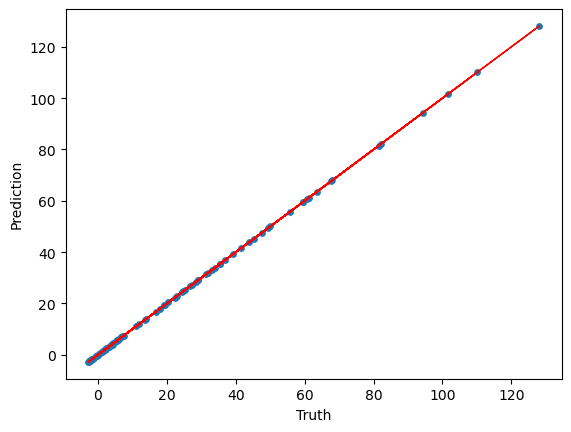

In [34]:
plt.scatter(y, p[6],s=15)
plt.plot(y,y, color='r', lw=1)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()

## 2. Gaussian

In [35]:
model.fit(X,n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          21.708725   
	1         2.291914                                          (x0 * x0)   
	2         0.031606                           ((x0 * x0) + -0.6965807)   
	3   >>>>  0.185106                              (cos(x1) + (x0 * x0))   
	4         0.066841                ((x0 * x0) + (cos(x1) * 2.2599428))   
	5         0.002179           ((x0 * x0) + (sin(cos(x1)) * 2.5385213))   
	6         0.086627  (((x0 * x0) + (cos(x1) * 2.2599428)) + -0.6570...   
	7         0.002768  (((x0 * x0) + (sin(cos(x1)) * 2.5385213)) + -0...   
	8         0.001346  (((x0 * (x0 + 0.13797115)) + (cos(x1) * 2.2599...   
	9         0.007438  ((((x0 * x0) + -0.6938036) + cos(1.0805446 * x...   
	10        0.004619  (((x0 * x0) + (cos(x1) * exp(cos(cos(x1 * 0.81...   
	11        0.035942  (((x0 * x0) + (cos(x1) * exp(cos(cos(x1 * -0.6...   
	12        0.000055  (((x0 * x0) + (cos(x1) * (exp(cos(cos(x1 * cos...   
	
	          loss  complexity  
	0   775.407300           1  
	1     7.921334           3  
	2     7.436108           5  
	3     6.179525           6  
	4     5.406268           8  
	5     5.394501           9  
	6     4.946862          10  
	7     4.933189          11  
	8     4.926553          12  
	9     4.890045          13  
	10    4.845078          15  
	11    4.674031          16  
	12    4.673515          18  
]

In [36]:
l_5 = model.latex()
p_5 = model.predict(X)
p.append(p_5), l.append(l_5)
md(f"The model has this equation as output: ${l[7]}$")

The model has this equation as output: $x_{0}^{2} + \cos{\left(x_{1} \right)}$

## 3. Uniform

In [37]:
model.fit(X,u)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                           22.92983   
	1         2.614282                                          (x0 * x0)   
	2         0.034299                            ((x0 * x0) + 0.5239931)   
	3         0.681419                              (cos(x1) + (x0 * x0))   
	4         0.622314                ((x0 * x0) + (cos(x1) * 2.9458907))   
	5         0.049409           ((x0 * x0) + (sin(cos(x1)) * 2.9458907))   
	6   >>>>  0.581561  ((x0 * x0) + ((cos(x1) + 0.25114146) * 2.94589...   
	7         0.193207  (((x0 * x0) + (cos(x1) * exp(1.0538523))) + 0....   
	8         0.059205  (((x0 * x0) + (cos(x1) * exp(cos(0.06678518)))...   
	9         0.000105  ((x0 * x0) + ((exp(-0.6047126) + cos(x1)) + ((...   
	10        0.000647  ((x0 * (x0 + -0.0019876026)) + ((exp(-0.604712...   
	11        0.001006  ((x0 * x0) + ((exp(-0.6047126) + cos(x1)) + ((...   
	
	          loss  complexity  
	0   773.023130           1  
	1     4.144346           3  
	2     3.869582           5  
	3     1.957616           6  
	4     0.563888           8  
	5     0.536704           9  
	6     0.300031          10  
	7     0.247319          11  
	8     0.233101          12  
	9     0.232978          17  
	10    0.232677          19  
	11    0.232443          20  
]

In [38]:
l_5 = model.latex()
p_5 = model.predict(X)
p.append(p_5), l.append(l_5)
md(f"The model has this equation as output: ${l[8]}$")

The model has this equation as output: $x_{0}^{2} + 2.95 \cos{\left(x_{1} \right)} + 0.740$

## 5 (3 fake) variables

In [39]:
X = 5 * np.random.randn(100, 5)
a = 2 #weight for noise
y = 2.5382 * np.cos(X[:,3]) + X[:,0] ** 2 - 0.5
n = y + a*np.random.randn(100)
u = y + a*np.random.rand(100)

we have created a dataset with 100 points with 5 features each. The relation we want to investigate is

$$
2.5382 cos(x_3)+x_0^2-0.5
$$

### Ideal

In [40]:
model.fit(X,y)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick         score                                           equation  \
	0         0.000000e+00                                           24.71106   
	1         9.837057e-08                                     exp(3.2072039)   
	2         5.612996e+00                                          (x0 * x0)   
	3         5.719157e-02                           ((x0 * x0) + -0.6332526)   
	4         7.567727e-01                              ((x0 * x0) + cos(x3))   
	5         6.731097e-01                ((x0 * x0) + (cos(x3) * 2.0405085))   
	6         1.631086e-01          ((x0 * x0) + (cos(x3) * exp(0.77061296)))   
	7         9.905516e-01  ((x0 * x0) + ((cos(x3) * 2.0405085) + -0.51096...   
	8         2.648606e-01  (((x0 * x0) + (cos(x3) * exp(0.77061296))) + -...   
	9         3.769009e+00  (((x0 * x0) + -0.49487406) + (cos(x3) * exp(co...   
	10        7.988535e-02  (((x0 * x0) + -0.49487406) + (cos(x3) * exp(si...   
	11        1.406417e+00  (((x0 * x0) + -0.49487406) + (cos(x3) * (exp(s...   
	12        2.748047e-01  (((x0 * x0) + -0.49487406) + (cos(x3) * (exp(s...   
	13        2.929015e-01  (((x0 * x0) + -0.49487406) + (cos(x3) * (exp(s...   
	14  >>>>  3.038731e-01  (((x0 * x0) + -0.49487406) + (cos(x3) * (exp(s...   
	
	           loss  complexity  
	0   1016.564300           1  
	1   1016.564200           2  
	2      3.710577           3  
	3      3.309524           5  
	4      1.552756           6  
	5      0.404062           8  
	6      0.343250           9  
	7      0.127473          10  
	8      0.097812          11  
	9      0.002257          12  
	10     0.002084          13  
	11     0.000125          15  
	12     0.000095          16  
	13     0.000071          17  
	14     0.000052          18  
]

In [41]:
l_5 = model.latex()
p_5 = model.predict(X)
p.append(p_5), l.append(l_5)
md(f"The model has this equation as output: ${l[9]}$")

The model has this equation as output: $x_{0}^{2} + 2.55 \cos{\left(x_{3} \right)} - 0.495$

### Gaussian noise


In [42]:
model.fit(X,n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          24.896336   
	1         2.399399                                          (x0 * x0)   
	2         0.013923                            ((x0 * x0) * 0.9882463)   
	3         0.386447                              ((x0 * x0) + cos(x3))   
	4   >>>>  0.271584                ((x0 * x0) + (cos(x3) * 2.4847798))   
	5         0.050592  ((x0 * x0) + (cos(x3) * (2.4847798 * 1.3083949)))   
	6         0.006829  ((x0 * x0) + (sin(cos(x3)) * exp(exp(0.2935614...   
	7         0.018472  (((x0 * x0) + (cos(x3) * (2.4847798 * 1.308394...   
	8         0.003843  (((x0 * x0) + (sin(cos(x3)) * exp(exp(0.293561...   
	9         0.000931  (((x0 * x0) + (sin(cos(x3)) * exp(exp(sin(0.29...   
	10        0.000763  (((x0 * x0) + (sin(cos(x3)) * exp(exp(sin(sin(...   
	11        0.007420  (((x0 + -3.216688) * x0) + (((x0 + (0.22875652...   
	12        0.000011  ((((x0 + -3.216688) * x0) + ((x0 + cos(x3)) * ...   
	
	           loss  complexity  
	0   1020.136660           1  
	1      8.405560           3  
	2      8.174735           5  
	3      5.554458           6  
	4      3.226612           8  
	5      2.916102          10  
	6      2.896256          11  
	7      2.843249          12  
	8      2.832344          13  
	9      2.829709          14  
	10     2.827552          15  
	11     2.806648          16  
	12     2.806519          20  
]

In [43]:
l_5 = model.latex()
p_5 = model.predict(X)
p.append(p_5), l.append(l_5)
md(f"The model has this equation as output: ${l[10]}$")

The model has this equation as output: $x_{0}^{2} + 2.48 \cos{\left(x_{3} \right)}$

### Uniform noise

In [44]:
model.fit(X,u)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                           25.77154   
	1        2.781620                                          (x0 * x0)   
	2        0.024154                           ((x0 * x0) + 0.42895746)   
	3        0.710924                              ((x0 * x0) + cos(x3))   
	4        0.516521                ((x0 * x0) + (cos(x3) * 2.4847798))   
	5        0.000204          ((x0 * x0) + (cos(x3) * exp(0.92726064)))   
	6  >>>>  0.654545  (((x0 * x0) + (cos(x3) * 2.4847798)) + 0.53238...   
	7        0.009381  (((x0 * x0) + 0.54651797) + (cos(x3) * exp(0.9...   
	8        0.000399  ((((x0 * x0) + (1.9938624 * 0.2704423)) + sin(...   
	
	          loss  complexity  
	0  1016.902160           1  
	1     3.901171           3  
	2     3.717190           5  
	3     1.825848           6  
	4     0.649861           8  
	5     0.649728           9  
	6     0.337650          10  
	7     0.334497          11  
	8     0.333431          19  
]

In [45]:
l_5 = model.latex()
p_5 = model.predict(X)
p.append(p_5), l.append(l_5)
md(f"The model has this equation as output: ${l[11]}$")

The model has this equation as output: $x_{0}^{2} + 2.48 \cos{\left(x_{3} \right)} + 0.532$

It seems that the model fails with gaussian noise, both with one variable and with two variables. The model is anyway solid with uniform noise. 

Now we can try to increase the number of data, to see if the model can recover the expression that we want.

### fix #1: increasing the points

In [46]:
X = 5 * np.random.randn(1000, 5)
a = 2 #weight for noise
y = 2.5382 * np.cos(X[:,3]) + X[:,0] ** 2 - 0.5
n = y + a*np.random.randn(1000)
model.fit(X,n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!

Expressions evaluated per second: 2.840e+05
Head worker occupation: 12.4%
Progress: 596 / 600 total iterations (99.333%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.408e+03  3.466e-07  25.82195
3           7.297e+00  2.631e+00  (x0 * x0)
5           7.009e+00  2.009e-02  ((x0 * x0) + -0.5360456)
6           5.380e+00  2.647e-01  ((x0 * x0) + cos(x3))
8           4.317e+00  1.101e-01  ((x0 * x0) + (cos(x3) * 2.4847798))
10          4.047e+00  3.230e-02  ((x0 * x0) + ((cos(x3) + -0.20284316) * 2.4847798))
11          4.046e+00  7.200e-05  ((x0 * x0) + ((cos(x3) + cos(-1.7823021)) * 2.4764316))
13          4.045e+00  1.117e-04  ((x0 * x0) + ((sin(cos(x3)) + -0.20284316) * (2.4847798 + 0.26...
                                  01606)))
14          4.045e+00  6.849e-05  ((x0 * x0) + ((sin(cos(x3)) + sin(-0.20284316)) * (2.4847798 +...
                      

PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                           25.82195   
	1        2.631380                                          (x0 * x0)   
	2        0.020086                           ((x0 * x0) + -0.5360456)   
	3  >>>>  0.264657                              ((x0 * x0) + cos(x3))   
	4        0.110071                ((x0 * x0) + (cos(x3) * 2.4847798))   
	5        0.032302  ((x0 * x0) + ((cos(x3) + -0.20284316) * 2.4847...   
	6        0.000072  ((x0 * x0) + ((cos(x3) + cos(-1.7823021)) * 2....   
	7        0.000112  ((x0 * x0) + ((sin(cos(x3)) + -0.20284316) * (...   
	8        0.000068  ((x0 * x0) + ((sin(cos(x3)) + sin(-0.20284316)...   
	
	          loss  complexity  
	0  1408.385300           1  
	1     7.296819           3  
	2     7.009498           5  
	3     5.379574           6  
	4     4.316593           8  
	5     4.046542          10  
	6     4.046250          11  
	7     4.045347          13  
	8     4.045070          14  
]

In [47]:
md(f"The model has this equation as output: ${model.latex()}$")

The model has this equation as output: $x_{0}^{2} + \cos{\left(x_{3} \right)}$

It seems that the problem persist: perhaps the problem is in the factor of amplification of the noise.

### fix #2: decreasing the noise

In [63]:
X = 5 * np.random.randn(100, 5)
a = 0.5 #weight for noise
y = 2.5382 * np.cos(X[:,3]) + X[:,0] ** 2 - 0.5
n = y + a*np.random.randn(100)
model.fit(X,n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick         score                                           equation  \
	0        0.000000e+00                                          26.796936   
	1        1.426203e-07                                     exp(3.2881517)   
	2        5.903669e+00                                          (x0 * x0)   
	3        2.832565e-02                          ((x0 * x0) + -0.45918417)   
	4        7.141627e-01                              ((x0 * x0) + cos(x3))   
	5        6.436580e-01                ((x0 * x0) + (cos(x3) * 2.6763172))   
	6  >>>>  3.186204e-01  ((x0 * x0) + ((cos(x3) + -0.20284316) * 2.4847...   
	7        3.396930e-04  ((x0 * x0) + ((cos(x3) + sin(-0.20284316)) * 2...   
	8        1.818874e-02  ((x0 * x0) + (((cos(x3) + -0.20284316) * 1.014...   
	
	          loss  complexity  
	0  1402.325000           1  
	1  1402.324800           2  
	2     3.827524           3  
	3     3.616718           5  
	4     1.770752           6  
	5     0.488746           8  
	6     0.258424          10  
	7     0.258336          11  
	8     0.253680          12  
]

In [64]:
md(f"The model has this equation as output: ${model.latex()}$")

The model has this equation as output: $x_{0}^{2} + 2.48 \cos{\left(x_{3} \right)} - 0.504$

We finally recovered an expression that looks like the ideal one: we can compute the difference between these two quantities.

y is the dataset generated, and f(x) is the prediction from the model with gaussian noise

Text(0, 0.5, '$y-f(x)$')

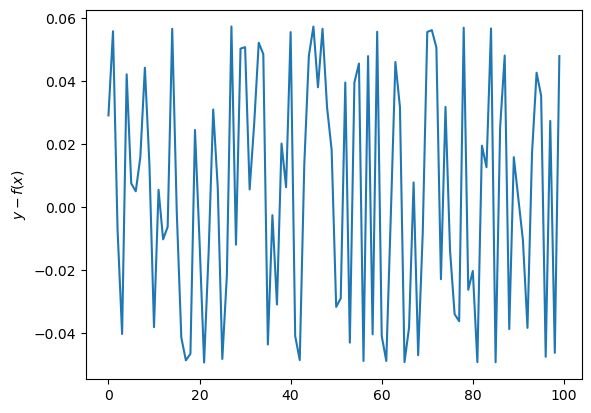

In [65]:
plt.plot(y-model.predict(X))
plt.ylabel(r'$y-f(x)$')

Let's evaluate the percentage error:

Text(0, 0.5, 'percentage error')

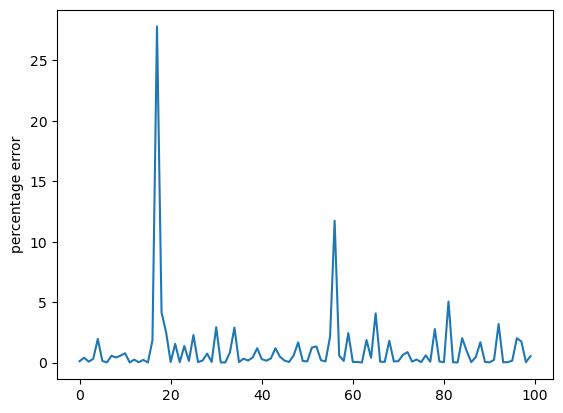

In [66]:
pc_err = 100*np.abs((y-model.predict(X))/y)
err_mean = np.mean(pc_err)
plt.plot(pc_err)
plt.ylabel('percentage error')

there are few critical points, probably these are the ones near zero, where y is small and so the noise is of the same order or pheraps of an higher order of magnitude of y.

In [67]:
md(f'The mean value of the percentage error is: {err_mean}')

The mean value of the percentage error is: 1.1458492892231193